In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
data = pd.read_excel('C:\\Users\\navee\\IPBL\\datasets\\country_vaccinations.xlsx')

In [3]:
temp = data[data['iso_code'] == 'AFG']

In [4]:
allVaccines = set()
a = data['vaccines'].unique()
for i in a:
    temp1 = i.split(', ')
    for j in temp1:
        allVaccines.add(j)

In [5]:
allVaccines

{'Abdala',
 'COVIran Barekat',
 'CanSino',
 'Covaxin',
 'EpiVacCorona',
 'FAKHRAVAC',
 'Johnson&Johnson',
 'Medigen',
 'Moderna',
 'Novavax',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'QazVac',
 'Razi Cov Pars',
 'Sinopharm/Beijing',
 'Sinopharm/Wuhan',
 'Sinovac',
 'Soberana Plus',
 'Soberana02',
 'SpikoGen',
 'Sputnik Light',
 'Sputnik V',
 'Turkovac',
 'ZF2001'}

In [40]:
len(allVaccines)

24

In [6]:
country = data['country'].unique()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

In [8]:
country

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [9]:
allVaccines

{'Abdala',
 'COVIran Barekat',
 'CanSino',
 'Covaxin',
 'EpiVacCorona',
 'FAKHRAVAC',
 'Johnson&Johnson',
 'Medigen',
 'Moderna',
 'Novavax',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'QazVac',
 'Razi Cov Pars',
 'Sinopharm/Beijing',
 'Sinopharm/Wuhan',
 'Sinovac',
 'Soberana Plus',
 'Soberana02',
 'SpikoGen',
 'Sputnik Light',
 'Sputnik V',
 'Turkovac',
 'ZF2001'}

In [10]:
total_vacc =  data.groupby('country')['total_vaccinations'].sum().sort_values(ascending = False)

<Axes: xlabel='country'>

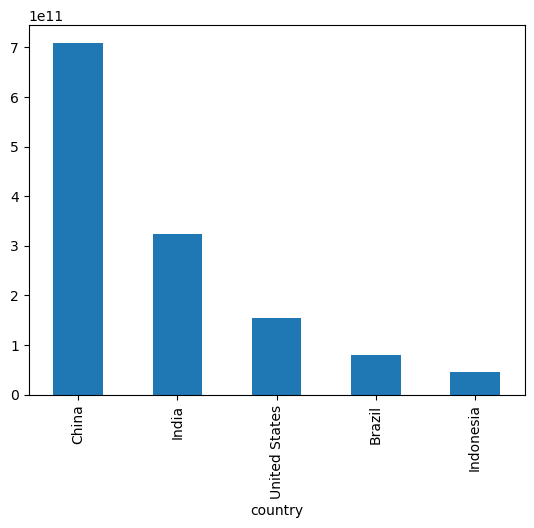

In [11]:
total_vacc.head().plot(kind = 'bar')

In [12]:
data.groupby('country')['vaccines']

In [13]:
VaccineDict = dict()
for i in allVaccines:
    VaccineDict[i]=set()

In [14]:
for i in range(0,len(data)):
    for j in allVaccines:
        if j in data.iloc[i]['vaccines']:
            VaccineDict[j].add(data.iloc[i]['country'])

In [15]:
data.iloc[1]['vaccines']

'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'

In [16]:
for i in VaccineDict:
    if len(VaccineDict[i]) !=0:
        print(i," = ",VaccineDict[i])

Sinopharm/Wuhan  =  {'United Arab Emirates', 'China'}
Covaxin  =  {'Mauritius', 'Paraguay', 'Botswana', 'Pakistan', 'India', 'Central African Republic', 'Ethiopia', 'Iran', 'Comoros'}
ZF2001  =  {'Turkmenistan', 'Uzbekistan', 'China'}
Sinopharm/Beijing  =  {'Trinidad and Tobago', 'Zimbabwe', 'Bolivia', 'Montenegro', 'Kyrgyzstan', 'Mongolia', 'Cameroon', 'Somalia', 'Tunisia', 'Kuwait', 'Sudan', 'Egypt', 'Kazakhstan', 'Maldives', 'Kenya', 'Mozambique', 'Iraq', 'United Arab Emirates', 'Turkmenistan', 'Jordan', 'Seychelles', 'Peru', 'Syria', 'Nepal', 'Afghanistan', 'Equatorial Guinea', 'Bahrain', 'Algeria', 'Dominica', 'Belarus', 'Lesotho', 'Cambodia', 'Georgia', 'Serbia', 'Gambia', 'Cape Verde', 'Bhutan', 'Guyana', 'Namibia', 'Niger', 'Malaysia', 'Sierra Leone', 'Comoros', 'Palestine', 'Burundi', 'Tanzania', 'Vietnam', 'Guinea', 'Iran', 'Philippines', 'Moldova', 'Belize', 'Pakistan', 'Senegal', 'Barbados', 'Armenia', 'Thailand', 'Congo', 'Chad', 'Rwanda', 'Burkina Faso', 'Ethiopia', 'Laos

In [17]:
countryCount =dict()
for i in VaccineDict:
    countryCount[i] = len(VaccineDict[i])

In [18]:
print(countryCount)

{'Sinopharm/Wuhan': 2, 'Covaxin': 9, 'ZF2001': 3, 'Sinopharm/Beijing': 90, 'SpikoGen': 1, 'COVIran Barekat': 1, 'CanSino': 7, 'Soberana Plus': 1, 'Soberana02': 4, 'Johnson&Johnson': 89, 'Novavax': 11, 'Sputnik V': 58, 'Razi Cov Pars': 1, 'Sputnik Light': 8, 'FAKHRAVAC': 1, 'QazVac': 2, 'Sinovac': 51, 'Oxford/AstraZeneca': 183, 'Medigen': 1, 'Pfizer/BioNTech': 158, 'Turkovac': 1, 'Abdala': 4, 'EpiVacCorona': 2, 'Moderna': 90}


In [19]:
sortedCount = dict(sorted(countryCount.items(), key=lambda item: item[1],reverse = True))

In [20]:
sortedCount

{'Oxford/AstraZeneca': 183,
 'Pfizer/BioNTech': 158,
 'Sinopharm/Beijing': 90,
 'Moderna': 90,
 'Johnson&Johnson': 89,
 'Sputnik V': 58,
 'Sinovac': 51,
 'Novavax': 11,
 'Covaxin': 9,
 'Sputnik Light': 8,
 'CanSino': 7,
 'Soberana02': 4,
 'Abdala': 4,
 'ZF2001': 3,
 'Sinopharm/Wuhan': 2,
 'QazVac': 2,
 'EpiVacCorona': 2,
 'SpikoGen': 1,
 'COVIran Barekat': 1,
 'Soberana Plus': 1,
 'Razi Cov Pars': 1,
 'FAKHRAVAC': 1,
 'Medigen': 1,
 'Turkovac': 1}

In [21]:
MostVaccine = list(sortedCount.keys())
VaccineValues = list(sortedCount.values())
for i in range(0,len(MostVaccine)):
    print(MostVaccine[i]," = ",VaccineValues[i])

Oxford/AstraZeneca  =  183
Pfizer/BioNTech  =  158
Sinopharm/Beijing  =  90
Moderna  =  90
Johnson&Johnson  =  89
Sputnik V  =  58
Sinovac  =  51
Novavax  =  11
Covaxin  =  9
Sputnik Light  =  8
CanSino  =  7
Soberana02  =  4
Abdala  =  4
ZF2001  =  3
Sinopharm/Wuhan  =  2
QazVac  =  2
EpiVacCorona  =  2
SpikoGen  =  1
COVIran Barekat  =  1
Soberana Plus  =  1
Razi Cov Pars  =  1
FAKHRAVAC  =  1
Medigen  =  1
Turkovac  =  1


<BarContainer object of 6 artists>

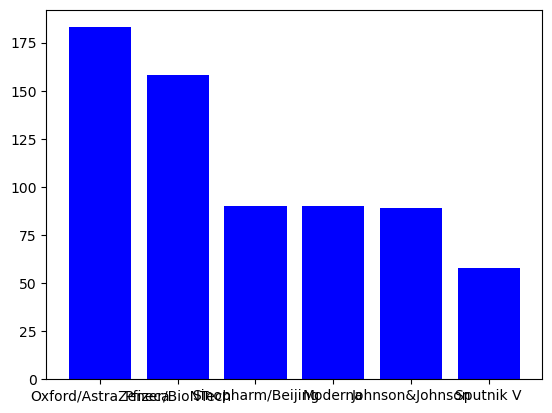

In [22]:
plt.bar(MostVaccine[:6], VaccineValues[:6], color='blue')

In [23]:
newData = pd.DataFrame()
newData['company'] = MostVaccine[:6]
newData['count'] = VaccineValues[:6]

<Axes: >

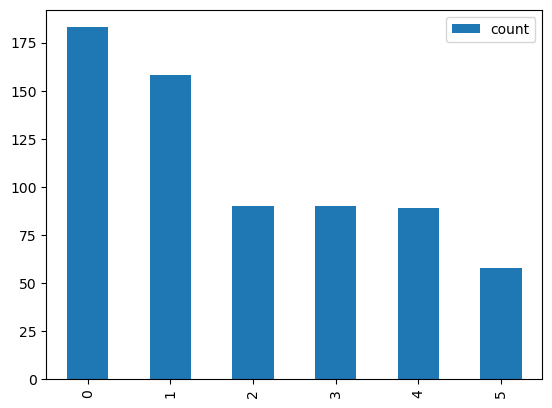

In [24]:
newData.plot(kind = 'bar')

In [25]:
newData

company  count
0  Oxford/AstraZeneca    183
1     Pfizer/BioNTech    158
2   Sinopharm/Beijing     90
3             Moderna     90
4     Johnson&Johnson     89
5           Sputnik V     58

<Axes: xlabel='company'>

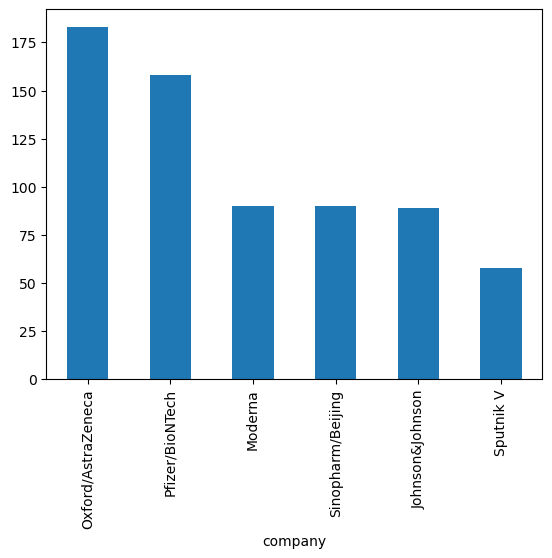

In [26]:
graph = newData.groupby('company')['count'].sum().sort_values(ascending = False)
graph.plot(kind = 'bar')

In [29]:
vaccines_by_country = data.groupby('country')['vaccines'].unique()

In [30]:
vaccines_by_country.to_excel("C:\\Users\\navee\\IPBL\\week2\\vaccination_data.xlsx", index=False)

In [32]:
data.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [33]:

# Assuming you have a DataFrame named 'data'
# Replace 'data' with the actual name of your DataFrame

# Convert the 'Date' column to datetime if it's not already
data['date'] = pd.to_datetime(data['date'])

# Sort the DataFrame by 'Date' to ensure proper calculation
data = data.sort_values(by='date')

# Calculate the number of vaccinations per day
data['Vaccinations per Day'] = abs(data['total_vaccinations'].diff())

# Display the DataFrame with the new column
print(data[['date', 'total_vaccinations', 'Vaccinations per Day']])

            date  total_vaccinations  Vaccinations per Day
58517 2020-12-02                 0.0                   NaN
58518 2020-12-03                 0.0                   0.0
58519 2020-12-04                 0.0                   0.0
43117 2020-12-04                 1.0                   1.0
58520 2020-12-05                 0.0                   1.0
...          ...                 ...                   ...
51495 2022-03-29           5478794.0            10006084.0
3303  2022-03-29          96504666.0            91025872.0
51898 2022-03-29            668206.0            95836460.0
71458 2022-03-29           2977006.0             2308800.0
86511 2022-03-29           9039729.0             6062723.0

[86512 rows x 3 columns]


In [34]:
boxplot = px.box(data, x=data['country'], y=data['total_vaccinations'], title='Boxplot')
boxplot.show()

In [35]:
histogram = px.histogram(data, x=data.groupby('country')['total_vaccinations'].sum(), color=data['country'].unique(), title='Histogram')
histogram.show()

In [36]:
bubble_chart = px.scatter(data, x=data['country'].unique(), y=data.groupby('country')['total_vaccinations'].sum(), 
                          size=data.groupby('country')['total_vaccinations'].sum(), color=data['country'].unique(), 
                          title='Bubble Chart')
bubble_chart.show()

In [37]:
scatter_plot = px.scatter(data, x=data['country'].unique(), y=data.groupby('country')['total_vaccinations'].sum(), 
                          color=data['country'].unique(), title='Scatter Plot')
scatter_plot.show()

<Axes: >

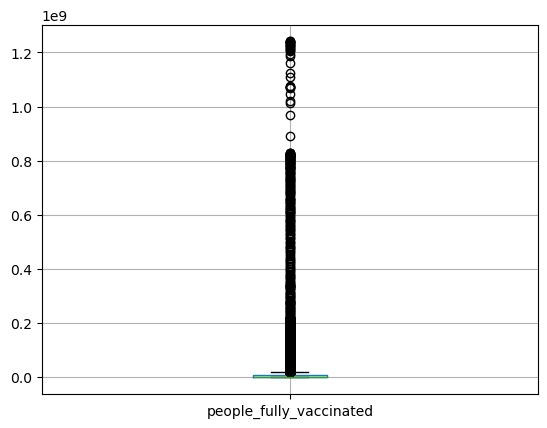

In [38]:
data.boxplot('people_fully_vaccinated')